#### Install Faker through a PyPi EAI

In [ ]:
!pip install faker

#### Generate fake data

In [1]:
# add faker to Packages
from faker import Faker
from random import randrange

f = Faker()
output = [[f.name(), f.address(), f.city(), f.state(), f.email(), 10 + randrange(70)]
    for _ in range(1000)]
output

[['Louis Caldwell',
  '6966 Turner Mountain\nWilsonborough, AZ 05457',
  'Hallmouth',
  'Georgia',
  'thompsonjermaine@example.net',
  33],
 ['Gilbert Douglas',
  '985 Andrew Centers Apt. 978\nLawsonview, KY 47210',
  'Port Shaunfort',
  'North Carolina',
  'nicole89@example.org',
  66],
 ['Melissa Mendoza',
  '3433 Duncan Glen Suite 270\nEstradaville, MA 37266',
  'Fernandobury',
  'Massachusetts',
  'udavis@example.org',
  14],
 ['Tamara Riddle',
  '8953 Mark Avenue Suite 881\nEast Matthewstad, OH 95410',
  'Lake Robert',
  'Nebraska',
  'michelle87@example.org',
  70],
 ['Kevin Palmer',
  '728 Conley Garden\nZimmermanville, MD 66457',
  'Mitchellport',
  'Oklahoma',
  'santanakristin@example.net',
  55],
 ['Brittney Martinez',
  '475 Kathryn Street\nLake Phillip, TN 33393',
  'North Beth',
  'North Carolina',
  'tjohnson@example.org',
  56],
 ['Shane Hardy',
  '514 Jones Union\nChristophershire, ME 76112',
  'North Cynthiachester',
  'Hawaii',
  'coryfowler@example.org',
  49],
 ['R

#### Connect to Snowflake

In [2]:
from snowflake.snowpark.context import get_active_session

session = get_active_session()
session.get_current_warehouse(), session.get_current_role()

c:\Projects\snowflake-apps\venv\Lib\site-packages\snowflake\connector\config_manager.py:351: UserWarning: Bad owner or permissions on C:\Users\crist\.snowflake\config.toml
  warn(f"Bad owner or permissions on {str(filep)}{chmod_message}")
c:\Projects\snowflake-apps\venv\Lib\site-packages\snowflake\connector\config_manager.py:351: UserWarning: Bad owner or permissions on C:\Users\crist\.snowflake\connections.toml
  warn(f"Bad owner or permissions on {str(filep)}{chmod_message}")


('"COMPUTE_WH"', '"ACCOUNTADMIN"')

#### Create Snowpark DataFrame

In [3]:
from snowflake.snowpark.types import StructType, StructField, StringType, IntegerType

schema = StructType([ 
    StructField("NAME", StringType(), False),  
    StructField("ADDRESS", StringType(), False), 
    StructField("CITY", StringType(), False),  
    StructField("STATE", StringType(), False),  
    StructField("EMAIL", StringType(), False),
    StructField("AGE", IntegerType(), False)
])
df = session.create_dataframe(output, schema=schema)
df

-------------------------------------------------------------------------------------------------------------------------------
|"NAME"              |"ADDRESS"                       |"CITY"          |"STATE"        |"EMAIL"                       |"AGE"  |
-------------------------------------------------------------------------------------------------------------------------------
|Louis Caldwell      |6966 Turner Mountain            |Hallmouth       |Georgia        |thompsonjermaine@example.net  |33     |
|                    |Wilsonborough, AZ 05457         |                |               |                              |       |
|Amy Griffith        |52687 Laura Forks Apt. 628      |Mathewsside     |Connecticut    |hporter@example.org           |45     |
|                    |North Paul, KY 90472            |                |               |                              |       |
|Luis Richards       |PSC 3288, Box 1087              |Staceyborough   |Florida        |steinkathleen@ex

#### Show a histogram with Matplotlib

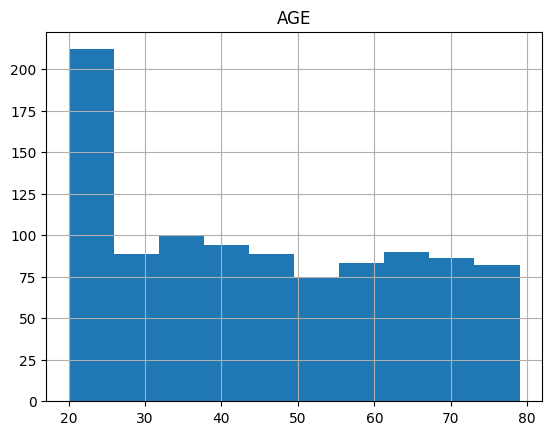

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

dfp = pd.DataFrame(df.collect())
dfp.hist(column="AGE", bins=10)
plt.show()